In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import yfinance as yf


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


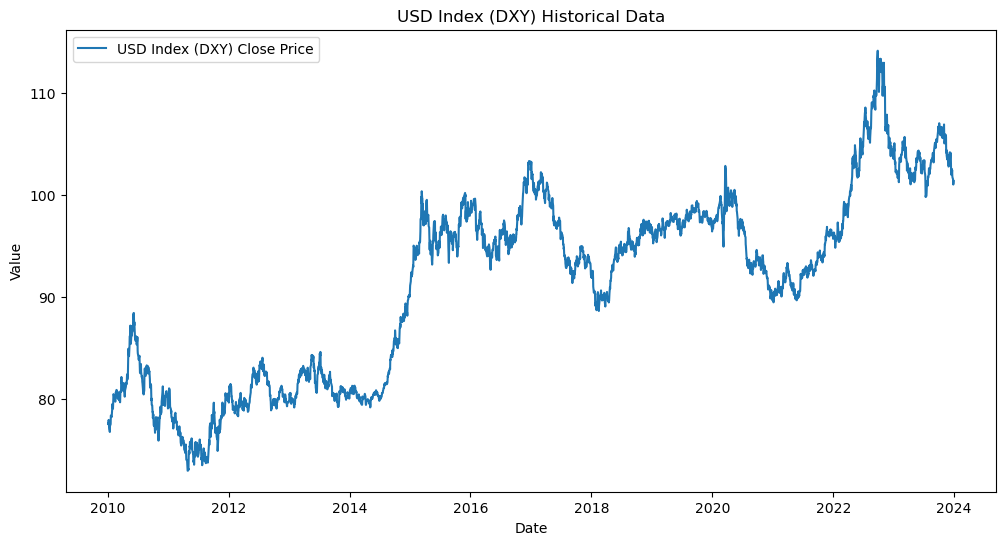

In [6]:
# Download USD Index (DXY) historical data
symbol = "DX-Y.NYB"
df = yf.download(symbol, start="2010-01-01", end="2024-01-01", interval="1d")

# Keep only the 'Close' price
df = df[['Close']]
df.dropna(inplace=True)

# Plot data
plt.figure(figsize=(12, 6))
plt.plot(df, label="USD Index (DXY) Close Price")
plt.title("USD Index (DXY) Historical Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


In [7]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Convert to PyTorch tensors
df_scaled = torch.tensor(df_scaled, dtype=torch.float32)


In [18]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])

    if len(X) == 0:  # Prevents empty tensors
        return None, None
    
    return torch.stack(X), torch.stack(y)

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

if X_train is None or y_train is None:
    raise ValueError("Not enough data to create sequences. Reduce seq_length or check dataset size.")

# Reshape only if sequences exist
X_train = X_train.unsqueeze(-1)
X_test = X_test.unsqueeze(-1)



ValueError: Not enough data to create sequences. Reduce seq_length or check dataset size.